In [ ]:
pip install transformers
pip install accelerate
pip install datasets
pip install evaluate
pip install seqeval
pip install spacy

# Agenda

1. [[Theory] Transformer Types. Cross-attention and Self-attention. Language Models](#Transformer_Types)
2. [Hugging Face](#Hugging_Face)
3. [Sentence classification with Transformers](#Sentence_classification_with_Transformers)
4. [Token classification with Transformers](#Token_classification_with_Transformers)
5. [Homework](#Homework)

# Resources
- https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data
- https://arxiv.org/abs/1706.03762
- https://medium.com/@corymaklin/transformers-explained-610b2f749f43
- https://vaclavkosar.com/ml/cross-attention-in-transformer-architecture
- https://medium.com/nlplanet/two-minutes-nlp-most-used-decoding-methods-for-language-models-9d44b2375612
- https://www.tensorflow.org/text/tutorials/transformer
- https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a
- https://en.wikipedia.org/wiki/Language_model
- https://machinelearningmastery.com/transfer-learning-for-deep-learning/
- https://medium.com/nlplanet/two-minutes-nlp-most-used-decoding-methods-for-language-models-9d44b2375612
- https://image-net.org/
- https://huggingface.co/
- https://github.com/huggingface/transformers
- https://huggingface.co/models
- https://huggingface.co/datasets
- https://huggingface.co/spaces
- https://huggingface.co/docs/transformers/model_doc/bert
- https://huggingface.co/docs/transformers/model_doc/roberta
- https://huggingface.co/docs/transformers/main_classes/tokenizer
- https://www.kaggle.com/competitions/company-acceptance-prediction/discussion/141609
- https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html
- https://huggingface.co/docs/transformers/tasks/token_classification
- https://pytorch-lightning.readthedocs.io/en/1.6.0/ecosystem/transformers.html
- https://huggingface.co/docs/transformers/tasks/sequence_classification

<a id='Transformer_Types'></a>
# [Theory] Transformer Types. Cross-attention and Self-attention. Language Models

For example, suppose we had the following sentences:

- On the river bank
- On the bank of the river

An LSTM or RNN wouldn’t realize that in the context of the second sentence, the word bank is referring to a location by a stream of water and not a financial institution. In contrast, a transformer is able to handle this scenario because it doesn’t read the words one after the other. Rather, it accepts the entire sentence at once.

## RNN vs Transformer processing

<table>
    <tr>
        <td><img src='https://www.tensorflow.org/images/tutorials/transformer/RNN+attention-words.png' style='width: 300px;'/></td>
        <td><img src='https://www.tensorflow.org/images/tutorials/transformer/Transformer-1layer-words.png' style='width: 300px;'/></td>
    </tr>
</table>

## Complete Transformer architecture
- Encoder
- Decoder

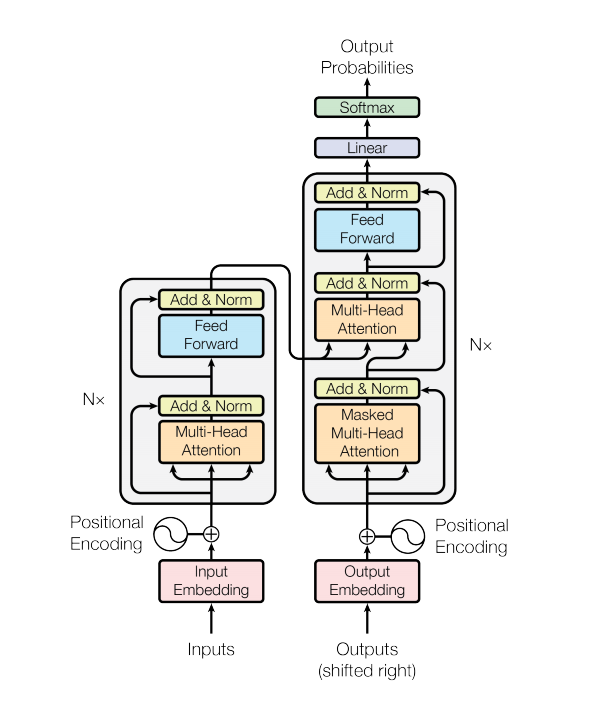

## Input Encoding

Consists of two embeddings:
- Word Embeddings - Embedding Matrix(Previous Lecture)
- Positional Embedding

### Positional Embedding

Embeddings represent a token in a d-dimensional space where tokens with similar meaning are closer to one another. However, the embeddings do not encode the relative position of the tokens in a sentence.

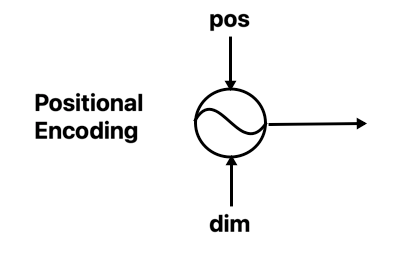

Formula

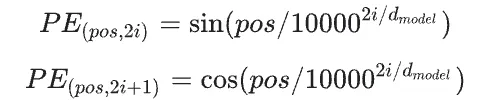

Positional encoding works because absolute position is less important than relative position. For instance, we don’t need to know that the word “good” is at index 6 and the word “looks” is at index 5. It’s sufficient to remember that the word “good” tends to follows the word “looks”.

Here’s a plot generated using a sequence length of 100 and embedding space of 512 dimensions:

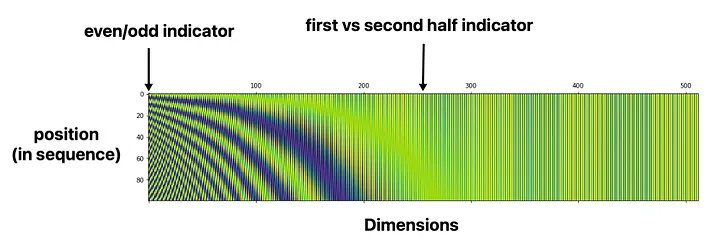

For the first dimension, if the value is 1, it’s an odd word, if the value is 0, it’s an even word. For the d/2th dimension, if the value is 1, we know the word is in the second half of the sentence and if the value is 0, then it’s in the first half of the sentence. The model can use this information to determine the relative position of the tokens.

**Final Encoding**

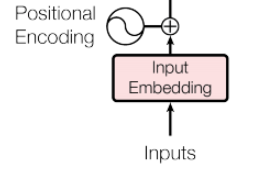

## Encoder

The Encoder’s job is to map all input sequences into an abstract continuous representation that holds the learned information (i.e. how words relate to one another).

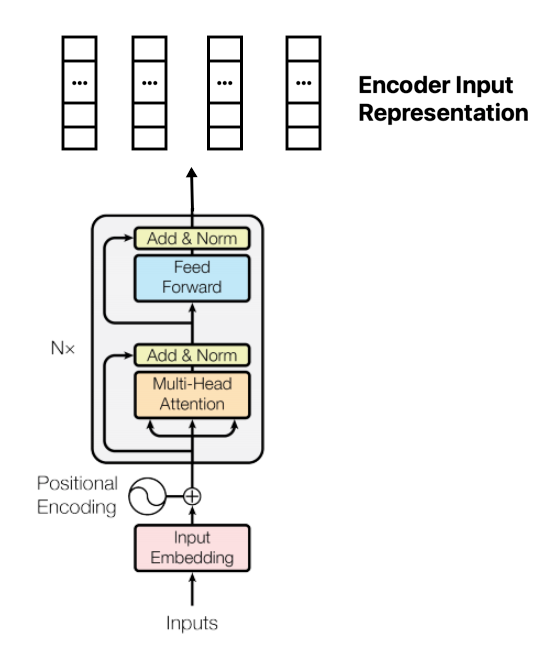

### Self-Attention Transformer

It is simply a Transformer, which consists of Input Encoding -> Encoder -> Final Classification layer

> **TODO**: Read more details : https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a

### Scaled Dot-Product Attention

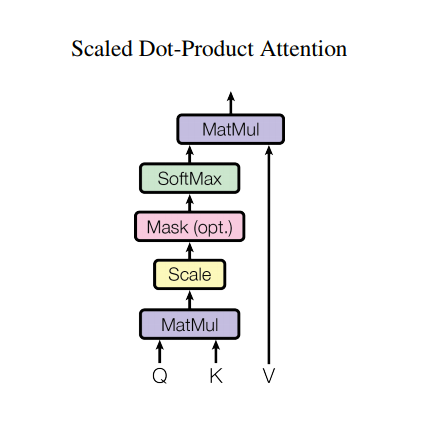

After feeding the query, key, and value vectors through a linear layer, we calculate the dot product of the query and key vectors. The values in the resulting matrix determine how much attention should be payed to the other words in the sequence given the current word. In other words, each word (row) will have an attention score for every other word (column) in the sequence.

> **TODO**: Why should we pass inputs through different linear layer ?
> **TODO**: Why dot product works for computing attention ?

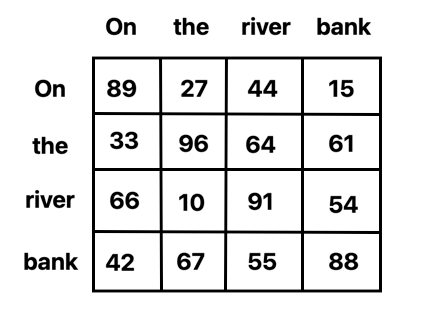

The dot product is scaled by a factor of square root of the depth. This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients which make it difficult to learn.

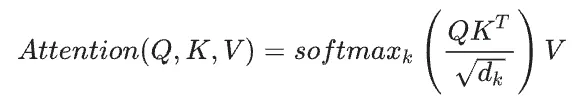

Once the values have been scaled, we apply a softmax function to obtain values between 0 and 1.

> **TODO**: Along which dimension softmax was applied ? How can we check it ?

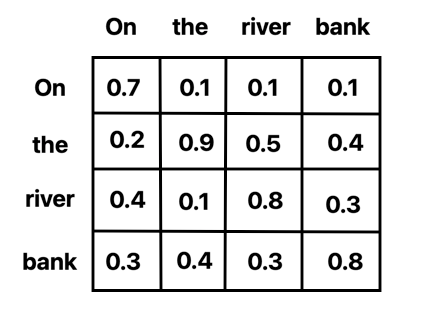

Finally, we multiply the resulting matrix by the value vector.

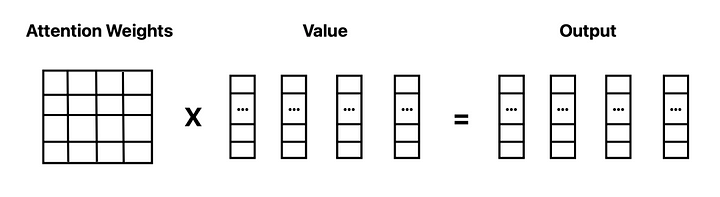

> **TODO**: Can you explain in simple words : What do we get after final multiplication ?

## Multi-Headed Attention

Instead of one single attention head, Q, K, and V are split into multiple heads because it allows the model to jointly attend to information from different representation subspaces at different positions. Splitting is performed by introducing different Linear layers and performing Scaled Dot-Product Attention for each separately. 

For example, given the word “the”, the first head will give more attention to the word “bank” whereas the second head will give more attention to the word “river”.

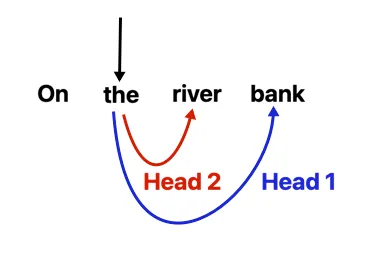

It’s important to note that after the split each head has a reduced dimensionality. Thus, the total computation cost is the same as a single head attention with full dimensionality. So if in casual setup you have used ONE `D` dimension linear projection in Multi-Head - you will use `N` linear projections with dims - `D/N`

The attention output for each head is concatenated and put through a Dense layer.

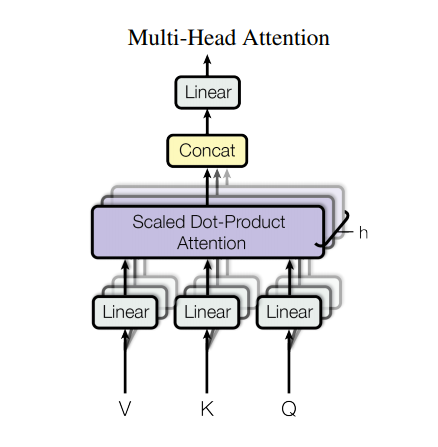

## The Residual Connections, Layer Normalization, and Feed Forward Network

The original positional input embedding is added to the multi-headed attention output vector. This is known as a residual connection. Each hidden layer has a residual connection around it followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks.

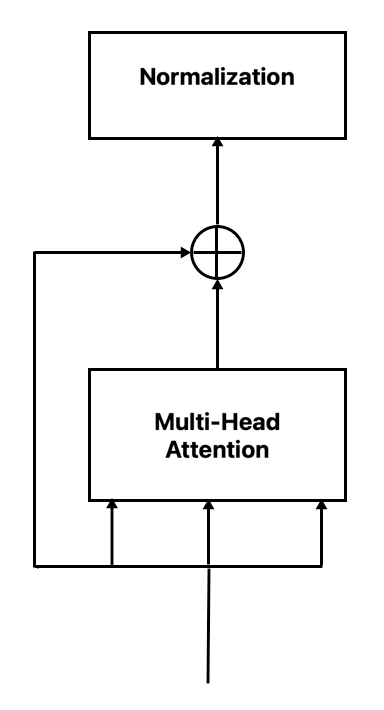

The output finishes by passing through a point wise feed forward network.

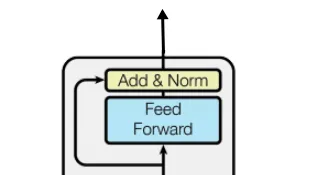

## Decoder

The decoder’s job is to generate text. The decoder has similar hidden layers to the encoder. However, unlike the encoder, the decoder’s output is sent to a softmax layer in order to compute the probability of the next word in the sequence.

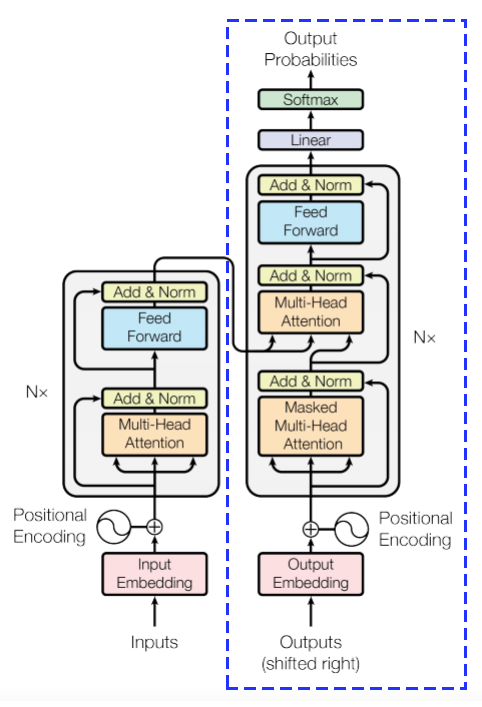

Detiled image, from which sequnaces we take Keys, Queries and Values. Concept explained on Translation task:

So assume we have access to the WHOLE input text sequence in English and we want to translate it to German:
1. We will do it word by word - we'll compute the first word of our German translation, then the second one and so on. Note that by doing it this way, our German translation does not need to have the same number of words as the English one, nor it needs to follow its word order. This kind of flexibility is the main advantage of cross-attention.
2. So, to get our first German word we generate a "query" vector (out of the blue), which in some sense means something like: "To which words in the input sequence I need to pay attention to have a good guess about how to begin my German translation?".
3. In the meantime, another neural network has produced a "key" and a "value" vectors for each English word, taking into account its position in the input sentence.
4. Now you compare your "query" vector from step 2 to each of those "keys". In essence, every "key" encodes some information about its corresponding English word, that could be relevant to different queries. For example, in this particular case, each "key" has some information about HOW IMPORTANT the corresponding English word is to figure out the FIRST word in our German translation. In other words, after comparing our first "query" to ALL the "keys", we end up with a set of weights for every corresponding input English word.
5. Now that we've identified English words in the input sequence that are important to generate our first German word, we multiply the weights obtained in the previous step by "values" of the corresponding English words (obtained in step 3) and add them up. In essence, "keys" were telling us WHICH English words are important with respect to our "query", while "values" of those words contain information about WHAT exactly needs to be extracted from those relevant words. 
6. Now we transform the vector obtained in step 5 (sum of "values" of relevant English words, according to our first "query") in some fixed way to arrive to our first German word. Hurrah!
7. Now that we have our first German word, we encode it in some way and use it to produce our "query" #2 (i.e. not out of the blue this time). This "query" will help us search for relevant words in the input Englush sequence to generate the second German word, but also taking into account the first German word we have generated earlier.
8. You get the idea: repeat steps 4-6 with "query" #2, then "query" #3 and so on, until we've generated every word of our output German translation.

Detailed explanation - https://vaclavkosar.com/ml/cross-attention-in-transformer-architecture

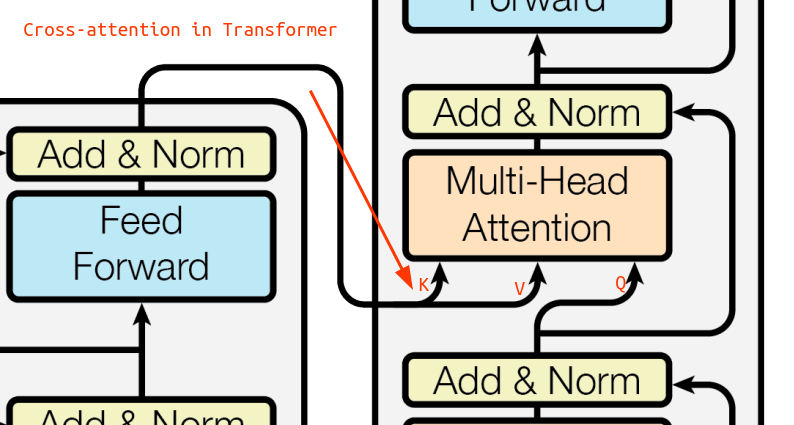

## Decoder Input Embeddings & Positional Encoding

The decoder is autoregressive meaning that it predicts future values based on previous values. To be exact, the decoder predicts the next token in the sequence by looking at the encoder’s output and self-attending to its own previous output. Just like we did with the encoder, we add the positional encodings to the word embedding to capture the position of the tokens in the sentence. **Pay attention to shifted right on the image**

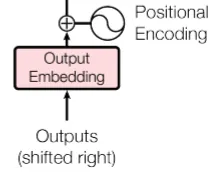

## Masking

Since the decoder is trying to generate the sequence word by word, a look-ahead mask is used to indicate which entries should not be used. For example, when predicting the third token in the sentence, only the previous tokens, that is, the first and second tokens, should be used.

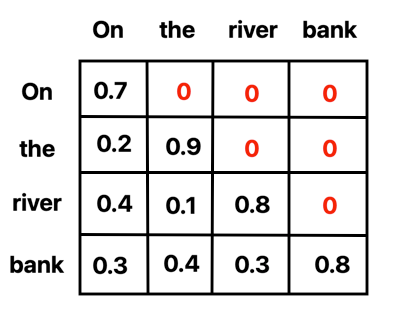

## Output

Like we mentioned previously, the output of the hidden layers goes through a final softmax layer. If we have a vocabulary of 10,000 words, then the output of the classifier will be a vector of length 10,000 where the value at each index is the probability that the word associated with that index is the next word in the sequence.

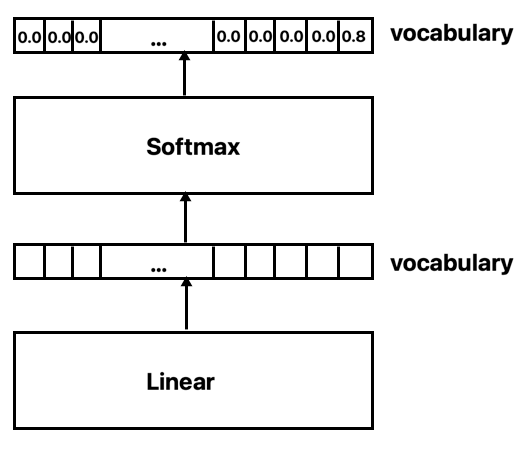

We take the word with the highest probability and append it to the sequence used in the next training iteration.

> **TODO**: Read about other sampling methods - https://medium.com/nlplanet/two-minutes-nlp-most-used-decoding-methods-for-language-models-9d44b2375612

In [1]:
from torch.nn import Transformer

Transformer()

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, o

# Language Modelling

Language modeling is the task of predicting the next word or character in a document. This technique can be used to train language models that can further be applied to a wide range of natural language tasks like text generation, text classification, and question answering. 

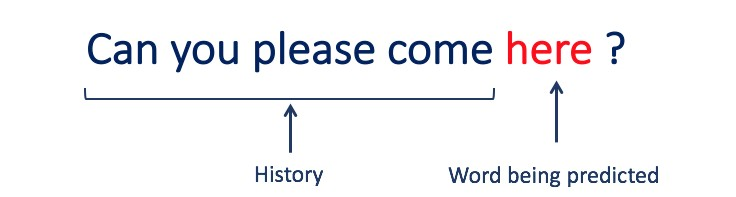

> **TODO**: Read about mathematical background of language modelling https://en.wikipedia.org/wiki/Language_model . Probability Theory works pretty cool there!

<a id='Hugging_Face'></a>
# [Hugging Face](https://huggingface.co/)

It is a big community, which provides:
- The most popular Transformer repo - https://github.com/huggingface/transformers
- Hub with pre-trained models - https://huggingface.co/models
- Hub with datasets - https://huggingface.co/datasets
- Spaces - where you can publish your model or try other peoples' published models - https://huggingface.co/spaces
- Some commercial solutions

We will use two first 

## Transfer Learning (in a short)

Original article - https://machinelearningmastery.com/transfer-learning-for-deep-learning/

**What does it mean "Pre-trained models" ???**

Lets take a look at the concept of Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

### Pipeline how to use Transfer Learning


1. **Select Source Model.** A pre-trained source model is chosen from available models. Many research institutions release models on large and challenging datasets that may be included in the pool of candidate models from which to choose from.
2. **Reuse Model.** The model pre-trained model can then be used as the starting point for a model on the second task of interest. This may involve using all or parts of the model, depending on the modeling technique used.
3. **Tune Model.** Optionally, the model may need to be adapted or refined on the input-output pair data available for the task of interest.

### Tranfer Learning Use-Cases

- **Transfer Learning with Image Data:** For example this may be a prediction task that takes photographs or video data as input. For these types of problems, it is common to use a deep learning model pre-trained for a large and challenging image classification task such as the [ImageNet](https://image-net.org/) 1000-class photograph classification competition. This approach is effective because the images were trained on a large corpus of photographs and require the model to make predictions on a relatively large number of classes, in turn, requiring that the model efficiently learn to extract features from photographs in order to perform well on the problem.
- **Transfer Learning with Language Data:** It is common to perform transfer learning with natural language processing problems that use text as input or output. For these types of problems, a word embedding is used that is a mapping of words to a high-dimensional continuous vector space where different words with a similar meaning have a similar vector representation. Pre-trained models are mostly trained on Language modelling tasks, so they should keep well structed context information in their word embeddings

### Benefits from Transfer Learning


1. **Higher start.** The initial skill (before refining the model) on the source model is higher than it otherwise would be.
2. **Higher slope.** The rate of improvement of skill during training of the source model is steeper than it otherwise would be.
3. **Higher asymptote.** The converged skill of the trained model is better than it otherwise would be.

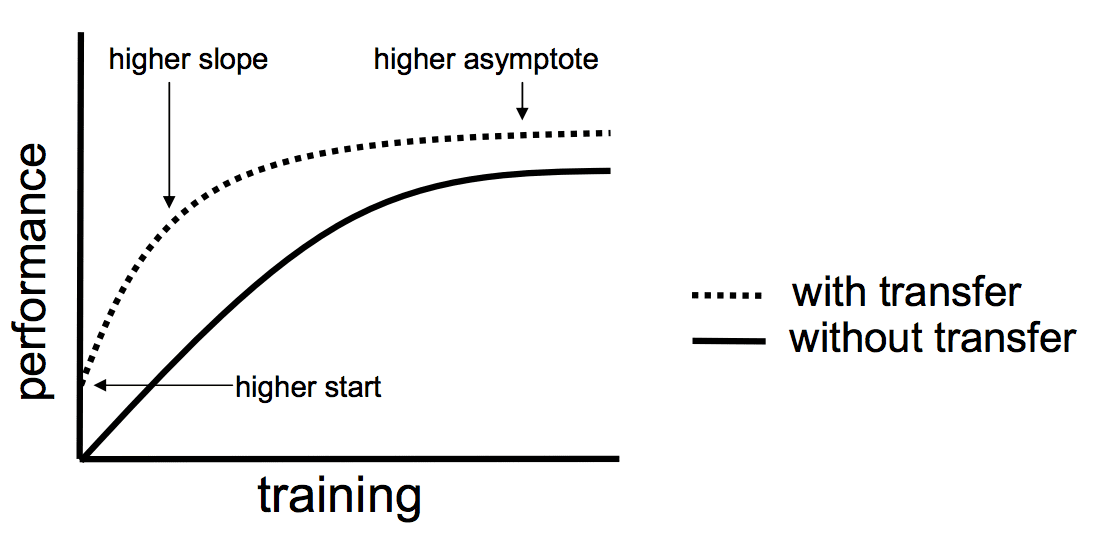

### Naive Intuition: Why does Transfer Learning work ?

Transfer learning "can be called" inductive transfer. This is where the scope of possible models (model bias) is narrowed in a beneficial way by using a model fit on a different but related task.

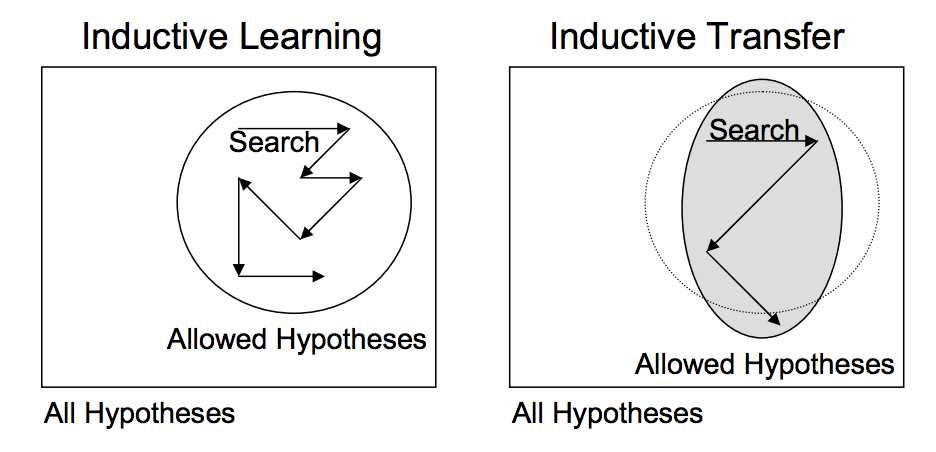

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForTokenClassification

# Lets construct tokenizer and model 
# TODO: Read more about Bert : https://huggingface.co/docs/transformers/model_doc/bert
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')
model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [4]:
from transformers import pipeline

# Now lets try this model in Language modelling task
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.10731080919504166,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.08774496614933014,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.05338389426469803,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i'm a new model."},
 {'score': 0.04667229577898979,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i'm a super model."},
 {'score': 0.02709583193063736,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i'm a fine model."}]

<a id='Sentence_classification_with_Transformers'></a>
# Sentence classification with Transformers

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


df_twitter = pd.read_csv('../data/nlp-getting-started/train.csv')
df_twitter.sample(5)

id     keyword             location  \
420     609    arsonist              toronto   
125     180  aftershock                  304   
7537  10776    wreckage                India   
6047   8643    sinkhole                  NaN   
6049   8646    sinkhole  Trinidad and Tobago   

                                                   text  target  
420   Bloor/Ossington arsonist also burned a mattres...       0  
125   Sometimes you face difficulties not because yo...       0  
7537  Wreckage 'Conclusively Confirmed' as From MH37...       1  
6047  MRW when a sinkhole opens up beneath my friend...       1  
6049  nothing surprises me anymore and i am sure the...       0

In [6]:
MAX_LEN = int(df_twitter.text.str.split().apply(len).max()*1.5)

#straightforward train/test split

df_train, df_val = train_test_split(
    df_twitter, test_size=0.3, random_state=42, stratify=df_twitter.target, shuffle=True
)

df_twitter_test = pd.read_csv('../data/nlp-getting-started/test.csv')
df_twitter_test['target'] = 0

df_twitter_test.to_csv('../data/nlp-getting-started/test_0_target.csv', index=False)
df_train.to_csv('../data/nlp-getting-started/trf_train.csv', index=False)
df_val.to_csv('../data/nlp-getting-started/trf_val.csv', index=False)

## Preparation

### How does Transformer tokenizer work ?

Documentation link - https://huggingface.co/docs/transformers/main_classes/tokenizer

Transformer tokenizer is a very high level block, so it consumes plain text and returns:
- input_ids - Text tokens, already transformed to int (long)
- token_type_ids - type of token. This info is not used for casual Classification. But it is used for Q&A tasks. So in such a task you can just concatenate Question and Answer in one string and mark 0s for Question token_type_ids and 1s for Answer token_type_ids and then just classify if there is match with binary classification. We have used such an approach [here]( https://www.kaggle.com/competitions/company-acceptance-prediction/discussion/141609)
- attention_mask - Whether take into account token or not. It is pretty useful for padding. Check out `TextDataset` below 

Also tokenizer adds special tokens. Here are some examples:
- Bert tokens:
    - `[MASK]` - The token used for masking values. This is the token used when training this model with masked language modeling. This is the token which the model will try to predict.
    - `[CLS]` - The classifier token which is used when doing sequence classification (classification of the whole sequence instead of per-token classification). It is the first token of the sequence when built with special tokens.
    - `[SEP]` - The separator token, which is used when building a sequence from multiple sequences, e.g. two sequences for sequence classification or for a text and a question for question answering. It is also used as the last token of a sequence built with special tokens.
- RoBerta tokens:
    - `<s>` - The beginning of sequence token that was used during pretraining. Can be used a sequence classifier token.
    - `<\s>` - The separator token, which is used when building a sequence from multiple sequences, e.g. two sequences for sequence classification or for a text and a question for question answering. It is also used as the last token of a sequence built with special tokens.

In [8]:
tokenized_doc = tokenizer(df_train["text"].iloc[0])
tokenized_doc

{'input_ids': [101, 5869, 7136, 1999, 2327, 1019, 3655, 2005, 2417, 1011, 2422, 2770, 20871, 8299, 1024, 1013, 1013, 1056, 1012, 2522, 1013, 21117, 2620, 2080, 2620, 2487, 9818, 25619, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
print(f"Original Processed Text:\n{df_train['text'].iloc[0]}\n\n")
print(f"Transformed back Text after Tokenization:\n{' '.join(tokenizer.convert_ids_to_tokens(tokenized_doc['input_ids']))}")

Original Processed Text:
Las Vegas in top 5 cities for red-light running fatalities http://t.co/kC8O81BcHG


Transformed back Text after Tokenization:
[CLS] las vegas in top 5 cities for red - light running fatalities http : / / t . co / kc ##8 ##o ##8 ##1 ##bc ##hg [SEP]


### How does Transformer classify sentence ?

Conceptually it works pretty similar to Reccurent Nets (previous lecture) in the mean that it encodes tokens and produce some sequence of encoded tokens. BUT we need to supply to the classification layer only one embedding, not a sequence. How to choose it? 

It is a good question. There are a planty ways what exact representations to take, but there are two most popular:

1. **Classify only [CLS] token** - In such an approach Transformer will accumulate all main sentance information in [CLS] token 

![](https://d2l.ai/_images/bert-one-seq.svg)

2. **Average all tokens** - In such an approach we average all extracted information. In some cases such an approach outperfoms the first one 

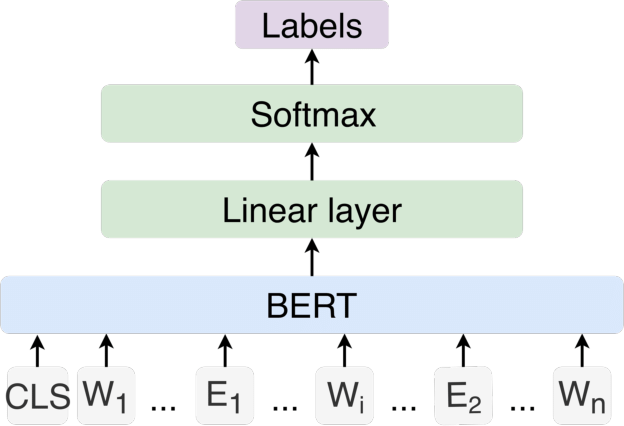

> **TODO**: Read about another approaches for extracting "sentence" vector for Text classification

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset

# Load your CSV file
dataset = load_dataset('csv', data_files={
    'train': '../data/nlp-getting-started/trf_train.csv',
    'val': '../data/nlp-getting-started/trf_val.csv',
    'test': '../data/nlp-getting-started/test_0_target.csv'
})
dataset = dataset.rename_column("target", "labels")
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'labels'],
        num_rows: 5329
    })
    val: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'labels'],
        num_rows: 2284
    })
    test: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'labels'],
        num_rows: 3263
    })
})

In [14]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,
    ignore_mismatched_sizes=True
)

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=int(MAX_LEN))

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5329 [00:00<?, ? examples/s]

Map:   0%|          | 0/2284 [00:00<?, ? examples/s]

Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

In [15]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 5329
    })
    val: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2284
    })
    test: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3263
    })
})

In [20]:
BATCH_SIZE = 64
NUM_EPOCHS = 2

training_args = TrainingArguments(
    'twitter_bert_checkpoints',
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=NUM_EPOCHS,
    overwrite_output_dir=True,
    do_train=True,
    do_eval=True
)

### Specific Scheduler and Optimization  

Transformers are tend to overfit very fast and also their training process is not so trivial as for Reccurent Nets

In this specific case we will use next 2 tricks:
1. Different learning rates for Encoder Net and Classification head. Idea is that
    - Pre-trained Encoder Net is well fitted and we do not want for it to cardinally change it weights. Such startegy helps to prevent overfitting to sepcific dataset and at the same time prevents `Catastrophic forgetting` (when Neural Net forgets general lingustic concepts)
    - Classification Net is randomly initialized and it should be well fitted for specific task
2. Learning rate scheduling with Warmup:
    - We will update learning rate more rapidly - after each iteration (batch), NOT after each epoch. Helps to get into a better local minimum 
    - We will firstly increase it and then decrease. Helps not to get in a bad local minimum from the start 

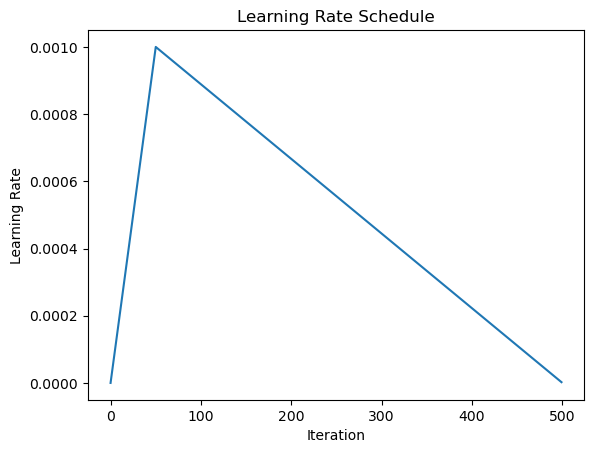

In [31]:
import torch
from matplotlib import pyplot as plt

def visualise_lr_scheduling(lr_scheduler_from_opt, n_steps, verbose=True, lr=1e-3):
    t_opt = torch.optim.SGD([torch.tensor(1)], lr=lr)
    t_sched = lr_scheduler_from_opt(t_opt)
    lrs = []
    for i in range(n_steps):
        t_opt.step()
        lrs.append(t_sched.get_lr()[0])
        t_sched.step()
    if verbose:
        plt.title("Learning Rate Schedule")
        plt.xlabel("Iteration")
        plt.ylabel("Learning Rate")
        plt.plot(lrs)
        plt.show()
    return lrs


visualise_lr_scheduling(
    lr_scheduler_from_opt=lambda opt: get_linear_schedule_with_warmup(
        optimizer=opt, 
        num_warmup_steps=50, 
        num_training_steps=500
    ),
    n_steps=500,
    lr=1e-3
);

In [32]:
from sklearn.metrics import f1_score
from transformers import AdamW, get_linear_schedule_with_warmup
import numpy as np


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"f1": f1_score(labels, predictions, average='macro')}


optimizer = AdamW([
    {'params': list(model.bert.parameters()), 'lr': 1e-5},
    {'params': list(model.classifier.parameters()), 'lr': 1e-3}
])


NUM_STEPS = int(NUM_EPOCHS*tokenized_datasets['train'].num_rows/BATCH_SIZE)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1*NUM_STEPS),
    num_training_steps=NUM_STEPS
)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [33]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val'], 
    optimizers=(optimizer, scheduler),
    compute_metrics=compute_metrics
)

In [34]:
trainer.train()

TrainOutput(global_step=168, training_loss=0.4436247235252744, metrics={'train_runtime': 34.652, 'train_samples_per_second': 307.573, 'train_steps_per_second': 4.848, 'total_flos': 251943224393040.0, 'train_loss': 0.4436247235252744, 'epoch': 2.0})

> **TODO**: Check if this configuration really leads to overfit after epoch=2

In [35]:
preds = trainer.predict(tokenized_datasets['test'])
submission = pd.read_csv('../data/nlp-getting-started/sample_submission.csv')
submission['target'] = preds.predictions.argmax(axis=1)
submission.to_csv('bert_base_uncased_submission.csv', index=False)

![](./images/bert_clf_lb.png)

<a id='Token_classification_with_Transformers'></a>
# Token classification with Transformers

In [57]:
import pandas as pd

df_locations = pd.read_csv('../data/nlp-ua-locations-extractions/uk_geo_dataset.csv')
df_locations.sample(10)

text loc_markers  \
144520  В результаті, і річковий транспорт розвиваєтьс...          []   
619080  А Марина Ставнійчук, член Венеціанської комісі...  [(52, 59)]   
471474  У воротах з'явився довготелесий хлопець, який,...          []   
232950  Що стосується комісії, то при переказі 1000 до...  [(52, 55)]   
960315  Бойовики застосовували міномети калібру 120 мм...          []   
838564  Довгий список Міжнародної Букерівської премії ...          []   
136509  Олександр Зубков та Ігор Харатін із "Ференцвар...          []   
209334  Стало відомо, які іграшки виготовляють в Украї...  [(41, 48)]   
858798  Порядок продажу земельних ділянок державної та...          []   
668278  Кравцов запевнив, що пластика на стаканчиках н...          []   

                 org_markers                    per_markers  is_valid  
144520                    []                             []         0  
619080            [(26, 47)]                      [(2, 19)]         0  
471474                    []                             []         0  
232950                    []                             []         0  
960315                    []                             []         0  
838564            [(14, 45)]                             []         0  
136509  [(37, 49), (64, 71)]  [(0, 16), (20, 32), (73, 87)]         0  
209334                    []                             []         0  
858798                    []                             []         0  
668278                    []                             []         0

In [58]:
df_locations.shape

(1010000, 5)

In [59]:
df_valid = df_locations[df_locations.is_valid.astype(bool)].sample(frac=0.1)
df_train = df_locations[~df_locations.is_valid.astype(bool)].sample(frac=0.05)
df_locations = pd.concat([df_train, df_valid])

## Text file in CoNLL format
The CoNLL format is a text file with one word per line with sentences separated by an empty line. The first word in a line should be the word and the last word should be the label.

Consider the two sentences below;

Harry Potter was a student at Hogwarts<br>
Albus Dumbledore founded the Order of the Phoenix<br>
**These two sentences can be prepared in a CoNLL formatted text file as follows:**

> Harry B-PER <br>
> Potter I-PER<br>
> was O<br>
> a O<br>
> student B-MISC<br>
> at B-PER
> Hogwarts I-PER<br>

> Albus B-PER<br>
> Dumbledore I-PER<br>
> founded O<br>
> the O<br>
> Order B-ORG<br>
> of I-ORG<br>
> the I-ORG<br>
> Phoenix I-ORG<br>

In [60]:
import spacy

from spacy.training.iob_utils import biluo_to_iob, doc_to_biluo_tags
from tqdm.autonotebook import tqdm
tqdm.pandas()

df_locations.loc_markers = df_locations.loc_markers.apply(lambda x: [[y[0], y[1], 'LOC']  for y in eval(x)])

nlp = spacy.blank("xx")

def convert_to_conll(row):
    data = {
        "text": row['text'],
        "label": row['loc_markers']
    }
    doc = nlp(data["text"])
    ents = []
    for start, end, label in data["label"]:
        span = doc.char_span(start, end, label=label)
        if span is not None:
            ents.append(span)
        else:
            pass
        #TODO fix not align to toke case
        '''
            print(
                "Skipping span (does not align to tokens):",
                start,
                end,
                label,
                doc.text[start:end],
            )
        '''
    doc.ents = ents
    return {
        'tokens': list([t.text for t in doc]),
        'labels': list(biluo_to_iob(doc_to_biluo_tags(doc)))
    }

df_locations['conll'] = df_locations.progress_apply(convert_to_conll, axis=1)

  0%|          | 0/51000 [00:00<?, ?it/s]

In [61]:
label2id = {'O': 0, 'B-LOC': 1, 'I-LOC': 2}

df_locations['tokens'] = df_locations.conll.str['tokens']
df_locations['ner_tags'] = df_locations.conll.str['labels'].apply(lambda x: [label2id[t] for t in x])

df_train = df_locations[df_locations.is_valid == 0]
df_valid = df_locations[df_locations.is_valid == 1]

In [62]:
df_train[['tokens', 'ner_tags']].to_json(
    '../data/nlp-ua-locations-extractions/train_processed.json', orient='records', lines=True)
df_valid[['tokens', 'ner_tags']].to_json(
    '../data/nlp-ua-locations-extractions/valid_processed.json', orient='records', lines=True)

In [63]:
from datasets import load_dataset

raw_datasets_ua = load_dataset(
    "json",
    data_files={
        'train': '../data/nlp-ua-locations-extractions/train_processed.json',
        'val': '../data/nlp-ua-locations-extractions/valid_processed.json'
    }
)
raw_datasets_ua

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 50000
    })
    val: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1000
    })
})

In [78]:
from transformers import AutoTokenizer, AutoModelForTokenClassification


id2label = {v: k for k, v in label2id.items()}

model = AutoModelForTokenClassification.from_pretrained(
    'bert-base-multilingual-cased',
    id2label=id2label,
    label2id=label2id,
)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


> **TODO**: check youscan/ukr-roberta-base as pretrained model

In [88]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)


def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True
    )
    all_labels = examples["ner_tags"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

In [80]:
tokenized_datasets_ua = raw_datasets_ua.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=raw_datasets_ua["train"].column_names,
)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [81]:
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-ua-loc-ner",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3
)

In [82]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW([
    {'params': list(model.bert.parameters()), 'lr': 1e-5},
    {'params': list(model.classifier.parameters()), 'lr': 1e-3}
])

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0.1*3*(tokenized_datasets_ua['train'].num_rows/16),
    num_training_steps=3*(tokenized_datasets_ua['train'].num_rows/16)
)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [89]:
import evaluate
import numpy as np

metric = evaluate.load("seqeval")

label_names = list(label2id.keys())

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

In [90]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets_ua["train"],
    eval_dataset=tokenized_datasets_ua["val"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    optimizers=(optimizer, scheduler)
)
trainer.train()

TrainOutput(global_step=9375, training_loss=0.006826393458048503, metrics={'train_runtime': 803.2234, 'train_samples_per_second': 186.748, 'train_steps_per_second': 11.672, 'total_flos': 5241047909415840.0, 'train_loss': 0.006826393458048503, 'epoch': 3.0})

In [108]:
from transformers import pipeline

# Replace this with your own checkpoint
model_checkpoint = "./bert-ua-loc-ner/checkpoint-9375/"
token_classifier = pipeline(
    "token-classification", model=model_checkpoint, aggregation_strategy="simple"
)

In [114]:
df_valid.loc[1000344].text

'Стрибок у відчинене вікно із 4-го поверху столичної школи на просп. Відрадному 12-річна дівчина зробила на перерві.'

In [115]:
token_classifier(df_valid.loc[1000344].text)

[{'entity_group': 'LOC',
  'score': 0.97812825,
  'word': 'просп. Відрадному',
  'start': 61,
  'end': 78}]

In [119]:
df_valid.loc[1008955].text

'Грузія однією з перших на Кавказі прийняла християнство як національну релігію, було це у далекому 326 році.'

In [120]:
token_classifier(df_valid.loc[1008955].text)

[{'entity_group': 'LOC',
  'score': 0.98815316,
  'word': 'Грузія',
  'start': 0,
  'end': 6},
 {'entity_group': 'LOC',
  'score': 0.9966873,
  'word': 'Кавказі',
  'start': 26,
  'end': 33}]

## Comparing Transformers to Reccurent Nets

**Pros**
+ Shows better performance in terms of metrics
+ Take into account all context 
+ Requires less text preprocessing
+ Because of Attention matrices - may be better interpretabile

**Cons**
- Much harder to train
- Overfits pretty fast
- Harder to deploy
- Requires GPU - both training and inference
- Works longer

<a id='Homework'></a>
# Homework

Thoery (5 points):
- Complete theory questions in Google Form
- Take a look at all links 
- Read and analyze all theory `TODO`s. In this lecture they are highly important 

Practice (10-15 points):
- First Option (Easier) - Apply [Sentence Classification/Sentence Regression](#Sentence_Classification) approach to [CommonLit - Evaluate Student Summaries](https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries)
    - Max Base Points: 10
    - Tune `BERT` / `DEBERTA` or other bert-like models, maybe re-write it. Tune all other hyper-params.
    - Try different optimizers lr schedulers 
    - Implement Cross-Validation and add test houldout
    - Make a submit to Kaggle
- Second Option (Harder) - Apply [Token Classification](#Token_Classification) approach to Location Detection task
    - Max Base Points: 15
    - Introduce fixes, mentioned in `TODO`s
    - Your model also have to handle ukrainian and russian languages. Make sure to add `../data/mantis_analytics_location_detection/ru_geo_dataset.csv` (from https://www.kaggle.com/datasets/vladimirsydor/mantis-analytics-location-detection/data). Think about
        - New Validation
        - New Word Embeddings
        - Maybe separate models
        - IMPORTANT: Take into account `doc_id`
        - Take into account that markup is far from ideal. Maybe pre-processing may help
    - Coming back to Lecture 3. F1 is the final production metric but it hardly depends on threshold. Maybe you can use some "soft" metric for model comparison ? 
    - Do we need additional post-processing ?
    - Tune `BERT` / `DEBERTA` or other bert-like models on the whole dataset for more epochs, maybe re-write it. Tune all other hyper-params.
    - Try different optimizers lr schedulers 
    - Implement Cross-Validation and add test houldout
    - Make a submit to Kaggle
    - Additional points: first private score - 25 points, second private score - 15 points, third private score - 10 points
    - Do not hesitate to use `Discussion` and `Code` on Kaggle. All additional useful insights will be also granted with additional scores
        - If you do not want to share with other competitors - you can share with lectors. It can be useful for Mantis usecase 
- Third Option (Hardest). Do both first and second options
- Form will contain separate places for First and Second Options. Just put `-` for Option, which you have not choosen 